In [21]:
# Check version inside your Python program
from platform import python_version
print(python_version())

2.7.17


In [22]:
import cv2
import numpy as np
import skimage
from matplotlib import pyplot as plt

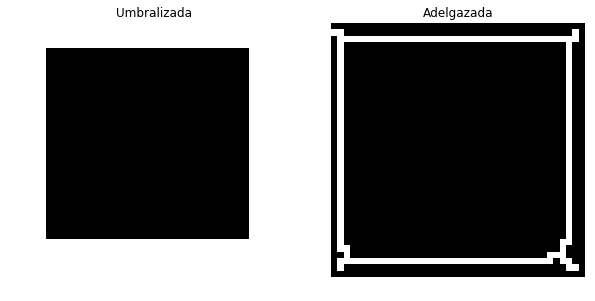

In [26]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

image = cv2.imread('imgs/cuadrado.jpeg') ## Se lee la imagen
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ## Se pasa la imagen a un formato de escala de grises
a,umbralized = cv2.threshold(image,128,255,cv2.THRESH_BINARY) ## Se realiza la umbralizacion de la imagen
adelgazar_1 = adelgazar(umbralized)## Se llama por primera vez al algoritmo de adelgazamiento

Fin=False
while (Fin != True) : ## Se entra aun ciclo del que solo se sale si se ha terminado el adelgazamiento 
    adelgazar_2=adelgazar(adelgazar_1) ##Se llama nuevamente al algoritmo de adelgazamiento
    diferencia=cv2.subtract(adelgazar_1,adelgazar_2) ##Se realiza la diferencia entre la imagen nueva y                                                         la anterior
    adelgazar_1=adelgazar_2 ##Se actualiza la imagen anterior para una posible nueva iteracion
    if not np.any(diferencia): ##Si las 2 imagenes, anterior y nueva son iguales se termina el algoritmo
       break 

plt.figure(figsize=(10,5)) 
plt.subplot(1, 2, 1)
plt.imshow(umbralized, cmap='gray')   # Se muestra la imagen original   
plt.title('Umbralizada')           
plt.axis('off') 

plt.subplot(1, 2, 2)
plt.imshow(adelgazar_1, cmap='gray')   # Se muestra la imagen adelgazada   
plt.title('Adelgazada')
plt.axis('off')             

plt.show()


In [27]:
def adelgazar (imagen):

    Kernel1_1= np.array ([  (0,0,0),  ## Se declaran todos los kernel, para cada iteracion, _1 es hit, _2 
                            (0,1,0),  ## es miss
                            (1,1,1)],np.uint8)

    Kernel1_2=np.array ([   (1,1,1),
                            (0,0,0),
                            (0,0,0)],np.uint8)

    Kernel2_1=np.array ([   (0,0,0),
                            (1,1,0),
                            (1,1,0)],np.uint8)

    Kernel2_2=np.array ([   (0,1,1),
                            (0,0,1),
                            (0,0,0)],np.uint8)
    
    Kernel3_1=np.array ([   (1,0,0),
                            (1,1,0),
                            (1,0,0)],np.uint8)

    Kernel3_2=np.array ([   (0,0,1),
                            (0,0,1),
                            (0,0,1)],np.uint8)

    Kernel4_1=np.array ([   (1,1,0),
                            (1,1,0),
                            (0,0,0)],np.uint8)

    Kernel4_2=np.array ([   (0,0,0),
                            (0,0,1),
                            (0,1,1)],np.uint8)

    Kernel5_1=np.array ([   (1,1,1),
                            (0,1,0),
                            (0,0,0)],np.uint8)

    Kernel5_2=np.array ([   (0,0,0),
                            (0,0,0),
                            (1,1,1)],np.uint8)

    Kernel6_1=np.array ([   (0,1,1),
                            (0,1,1),
                            (0,0,0)],np.uint8)

    Kernel6_2=np.array ([   (0,0,0),
                            (1,0,0),
                            (1,1,0)],np.uint8)
    
    Kernel7_1=np.array ([   (0,0,1),
                            (0,1,1),
                            (0,0,1)],np.uint8)

    Kernel7_2=np.array ([   (1,0,0),
                            (1,0,0),
                            (1,0,0)],np.uint8)

    Kernel8_1=np.array ([   (0,0,0),
                            (0,1,1),
                            (0,1,1)],np.uint8)

    Kernel8_2=np.array ([   (1,1,0),
                            (1,0,0),
                            (0,0,0)],np.uint8)

    hit_miss_01= hit_miss (imagen, Kernel1_1, Kernel1_2)  ## Se llaman las 8 iteraciones del algoritmo 
    hit_miss_02= hit_miss (hit_miss_01, Kernel2_1, Kernel2_2) ## para completarlo con cada kernel
    hit_miss_03= hit_miss (hit_miss_02, Kernel3_1, Kernel3_2)
    hit_miss_04= hit_miss (hit_miss_03, Kernel4_1, Kernel4_2)
    hit_miss_05= hit_miss (hit_miss_04, Kernel5_1, Kernel5_2)
    hit_miss_06= hit_miss (hit_miss_05, Kernel6_1, Kernel6_2)
    hit_miss_07= hit_miss (hit_miss_06, Kernel7_1, Kernel7_2)
    hit_miss_08= hit_miss (hit_miss_07, Kernel8_1, Kernel8_2)

    return hit_miss_08      ##Se devuelve como resultado del adelgazamiento la ultima iteracion




In [28]:
def hit_miss (imagen, Kernel_1, Kernel_2):
    imagen_old = imagen
    
    imagen_Comp= cv2.bitwise_not(imagen) ## Se halla el complemento de la imagen
    imagen_old = cv2.erode(imagen_old, Kernel_1) ## Se halla la erosion de la imagen con el kernel hit
    imagen_Comp = cv2.erode(imagen_Comp, Kernel_2)## Se halla la erosion de la imagen complemento con el                                                         kernel miss
    hit_or_miss = cv2.bitwise_and(imagen_old,imagen_Comp) ## Se halla el resultado de la operacion hit or                                                       miss, haciendo AND entre las 2 erosiones anteriores    
    hit_or_miss_Comp = cv2.bitwise_not(hit_or_miss) ## Se halla el complemento de la operacion hit or miss
    result = cv2.bitwise_and(imagen,hit_or_miss_Comp) ## Se realiza AND entre la imagen original y el complemento de la operacion hit or miss, este resultado sera el adelgazamiento de 1 iteracion
    

    return result